## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib 
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results,  how ='outer')
# Display the data table for preview
merge_df.head()

Using matplotlib backend: Qt5Agg


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mice=merge_df["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()





In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

alldata_duplicate_mouse_id = merge_df[merge_df.duplicated("Mouse ID")]

alldata_duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
clean_df = merge_df[merge_df['Mouse ID'].isin(duplicate_mice)==False]
clean_mice=clean_df["Mouse ID"].value_counts()
clean_df_of_mice=len(clean_mice)
clean_df_of_mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_regimen_mean


drug_regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_regimen_median


drug_regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_regimen_variance


drug_regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_regimen_std

drug_regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
drug_regimen_sem

summary_stats_table = pd.DataFrame({"Mean": drug_regimen_mean, "Median":drug_regimen_median, "Variance":drug_regimen_variance, "Standard Deviation": drug_regimen_std, "SEM": drug_regimen_sem})

summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#summary_stats
summary_stats = clean_df.groupby("Drug Regimen")
clean_df["Tumor Volume (mm3)"].describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

AxesSubplot(0.125,0.125;0.775x0.755)


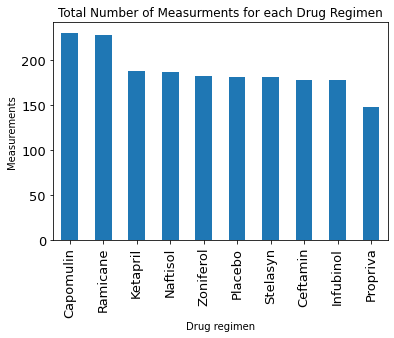

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measurements = clean_df["Drug Regimen"].value_counts().plot.bar( fontsize = 13)

# Data Bar Levels

total_measurements.set_xlabel("Drug regimen")
total_measurements.set_ylabel("Measurements")
total_measurements.set_title("Total Number of Measurments for each Drug Regimen")

print(total_measurements)


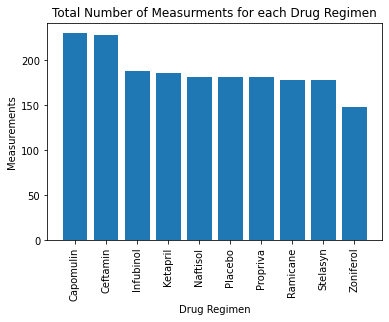

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measurements = clean_df["Drug Regimen"].value_counts()

x_axis = np.arange(len(total_measurements))

#Create the bar graph
plt.bar(x_axis, total_measurements)

#create  for X-axis ticks

plt.xticks(x_axis, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva',
                            'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation= "vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")
plt.title("Total Number of Measurments for each Drug Regimen")

plt.show()

Text(0, 0.5, '')

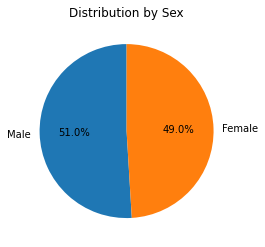

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# use autopct='%1.1f%%' to show the percentages 

gender_data = clean_df["Sex"].value_counts()

gender_pie_plot = gender_data.plot.pie( startangle = 90, autopct="%1.1f%%", title ="Distribution by Sex")

#need to hide the y label as it overlaps with male 
gender_pie_plot.set_ylabel('')

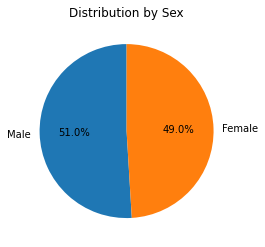

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = clean_df["Sex"].value_counts()

# make the pie graph
labels = "Male","Female"
plt.pie(gender_data, startangle =90,autopct="%1.1f%%",labels=labels)
plt.title("Distribution by Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(merge_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_df = pd.merge(merge_df, max_timepoint_df, on='Mouse ID')
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [47]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# remember to keep spacing in the for loop
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
       drug_df = combined_df.loc[combined_df['Drug Regimen'] == treatment]
    
    # add subset 
       final_volume_df = drug_df.loc[drug_df['Timepoint'] == drug_df['max_timepoint']]
    
    # Determine outliers using upper and lower bounds
    

       values = final_volume_df['Tumor Volume (mm3)']
       tumor_vol_data.append(values)
    
       quartiles = values.quantile([.25, .5, .75])
       lowerq = quartiles[.25]
       upperq = quartiles[.75]
       iqr = upperq - lowerq

    # Identify outliers 
       lower_bound = lowerq - (1.5*iqr)
       upper_bound = upperq + (1.5*iqr)

       print(f'Lower Bound for {treatment}: {lower_bound}')
       print(f'Upper Bound for {treatment}: {upper_bound}')

       outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |
                                (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
       print(f'Number of {treatment} outliers: {outliers_count}')
    


Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
f

## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
